# Extracción de características

## Electrocardiograma

El objetivo de esta práctica es familiarizarse con el procesamiento básico de señales y adquirir conocimientos prácticos sobre el análisis de ECG.

El electrocardiograma registra las señales eléctricas del corazón. Es una prueba común e indolora que se usa para detectar con rapidez problemas cardíacos y controlar la salud del corazón.

##### **Actividades**

1.   Cargar el archivo de datos de ECG
2.   Graficar el ECG
3.   Calcular FFT de la señal de ECG original
4.   Diseñar filtro rechaza banda.
5.   Diseñar filtro pasa altas.
6.   Diseñar filtro pasa bajas.
7.   Diseñar filtro pasa banda.
8.   Filtrar la señal de ECG con cada uno de los filtros diseñados.
9.   Graficar el ECG con cada uno de los filtros diseñados.
10.  Calcular FFT de la señal de ECG filtrada con cada uno de los filtros diseñados.
11.   Filtrar ondas T y R. Realizar gráficas.


##### **Información Adicional:**

*   Encuentra un conjunto de datos de ECG para trabajar. Puedes buscar en repositorios públicos o utilizar datasets disponibles para prácticas, como el MIT-BIH Arrhythmia Database. Descarga los datos en formato adecuado, como archivos CSV o WAV.
*   Utilizando una biblioteca de procesamiento de señales como NumPy y una biblioteca de visualización como Matplotlib, carga el archivo de datos del ECG y visualiza la señal en un gráfico. Asegúrate de etiquetar adecuadamente los ejes.

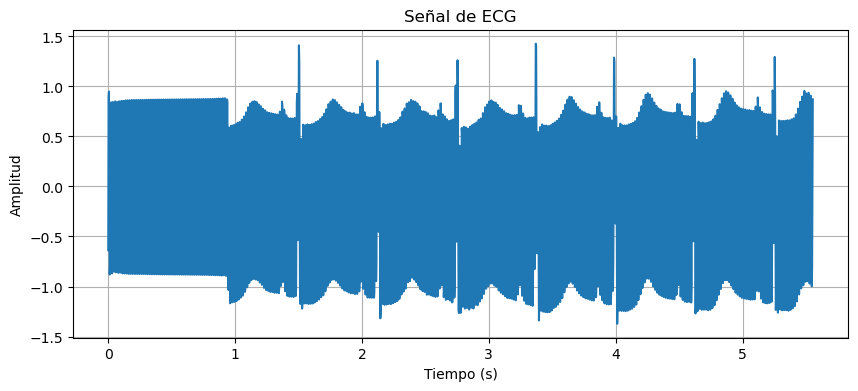

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar la señal de ECG desde un archivo CSV
ecg_data = np.genfromtxt('signals\signal.csv', delimiter=',')

# Obtener el tiempo y los valores del ECG
tiempo = ecg_data[:, 0]
valores_ecg = ecg_data[:, 1]

# Visualizar la señal de ECG
plt.figure(figsize=(10, 4))
plt.plot(tiempo, valores_ecg)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de ECG')
plt.grid(True)
plt.show()


##### Obtener los datos del ECG:

In [6]:
import numpy as np
import pandas as pd
import scipy.signal as sg
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

senal =  pd.read_csv('signals\signal.csv')                                      # Se carga la señal.
senal = np.asarray(senal)
t = senal[:,0]                                                                  # Se asigna la parte temporal a un variable t.
val = senal[:,1]      

##### Primero debemos calcular la frecuencia de muestreo.

In [33]:
N = len(val)                                                                    # Número de muestras
T = t[-1]/len(t)                                                                # Periodo.
F = int(round(1/T))                                                             # Frecuencia de muestreo.

##### En esta sección se calcula la transformada de Fourier de la señal original

In [ ]:
Fou1 = fft(val)                                                                 # Obtenemos transformada de Fourier de la señal cruda.
w1 = fftfreq(N, T)[:N//2]                                                       # Hacemos eje de frecuencias.
dB1 = 20*np.log( np.abs(Fou1[0:N//2]))        

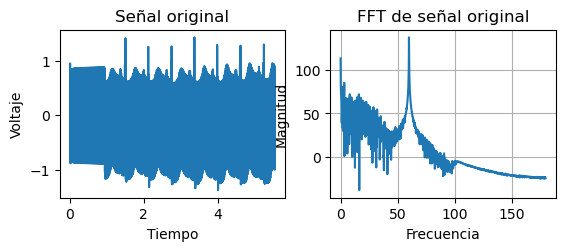

In [22]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(t, val)                                                                # Señal original
plt.title('Señal original') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(2,2,2)
plt.plot(w1, dB1)                                                               # Graficamos espectro de frecuencia de la señal original.
plt.title('FFT de señal original') 
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)

##### Primer filtro, rechaza banda o notch (Para quitar ruido de línea)

In [8]:
Fc = [56, 64]                                                                   # Frecuencias de corte para filtro rechaza banda.
Fc = np.array(Fc)
Fc = 2*Fc/F 
[b1,a1] = sg.butter (2, Fc, 'stop')                                             # Filtro butterworth, orden 2, rechaza banda
sf = sg.filtfilt(b1, a1, val)                                                   # Se filtra la señal
Fousf = fft(sf)                                                                 # Obtenemos transformada de fourier de la señal filtrada
dBsf = 20*np.log( np.abs(Fousf[0:N//2]))   

##### Segundo filtro, pasa altas (Quitar ruidos generados por respiración o movimientos)

In [9]:
Fc2 = 0.7                                                                       # Frecuencia de corte para filtro pasa altas.
Fc2 = np.array(Fc2)
Fc2 = 2*Fc2/F 
[b2,a2] = sg.butter (2, Fc2, 'high')                                            # Filtro butterworth, orden 2, pasa altas          
sf2 = sg.filtfilt(b2, a2, sf)                                                   # Se filtra la señal con filtro pasa altas
Fousf2 = fft(sf2)                                                               # Transformada de Fourier desde de filtrar con filtro pasa altas
dBsf2 = 20*np.log(np.abs(Fousf2[0:N//2]))                                          # dB de precencia de frecuencia


#### Tercer filtro, pasa bajas (Encontrar onda T)

In [10]:

Fc3 = 6                                                                         # Frecuencia de corte para filtro pasa bajas
Fc3 = np.array(Fc3)
Fc3 = 2*Fc3/F 
[b3,a3] = sg.butter (2, Fc3, 'low')                                             # Filtro butterworth, orden 2, pasa bajas 
sf3 = sg.filtfilt(b3, a3, sf2)                                                  # Se filtra la señal con filtro pasa bajas para resaltar la onda T
Fousf3 = fft(sf3)                                                               # Transformada de Fourier desde de filtrar con filtro pasa bajas
dBsf3 = 20*np.log( np.abs(Fousf3[0:N//2])    )                                      # dB de precencia de frecuencia


#### Cuarto filtro, pasa banda (Encontrar onda R)

In [11]:
Fc4 = [8, 22]                                                                   # Frecuencia de corte para filtro pasa banda
Fc4 = np.array(Fc4)
Fc4 = 2*Fc4/F 
[b4,a4] = sg.butter (2, Fc4, 'bandpass')                                        # Filtro butterworth, orden 2, pasa banda 
sf4 = sg.filtfilt(b4, a4, sf2)                                                  # Se filtra la señal con filtro pasa banda para resaltar la onda R
Fousf4 = fft(sf4)                                                               # Transformada de Fourier desde de filtrar con filtro pasa bajas
dBsf4 = 20*np.log(np.abs(Fousf4[0:N//2])   )                                       # dB de precencia de frecuencia


#### Aplicando filtros a señal de ECG

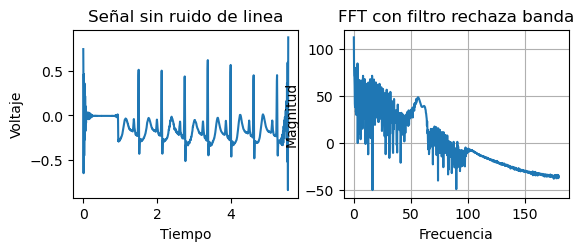

In [23]:
plt.subplot(2,2,1)
plt.plot(t, sf)                                                                 # Señal ECG sin ruido de linea 
plt.title('Señal sin ruido de linea') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(2,2,2)
plt.plot(w1, dBsf)                                                              # Graficamos espectro de frecuencia de la señal con el filtro notch.
plt.title('FFT con filtro rechaza banda')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)

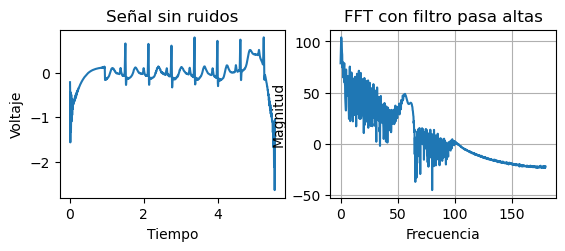

In [24]:
plt.subplot(2,2,1)
plt.plot(t, sf2)                                                                # Señal limpia, preprocesada
plt.title('Señal sin ruidos') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(2,2,2)
plt.plot(w1, dBsf2)                                                             # Graficamos espectro de frecuencia de la señal sin ruido.
plt.title('FFT con filtro pasa altas')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)

##### Graficando los resultados anteriores en conjunto

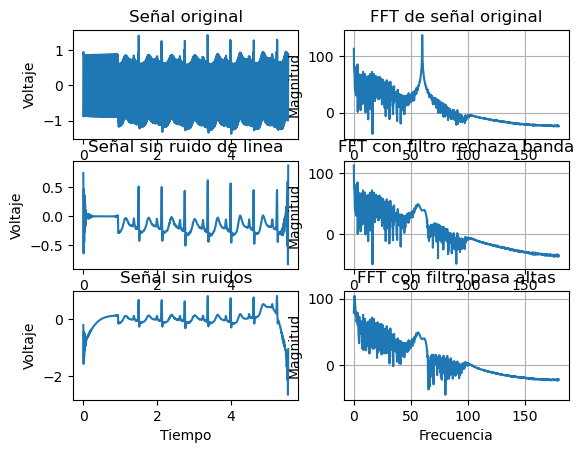

In [25]:

plt.figure()
plt.subplot(3,2,1)
plt.plot(t, val)                                                                # Señal original
plt.title('Señal original') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(3,2,2)
plt.plot(w1, dB1)                                                               # Graficamos espectro de frecuencia de la señal original.
plt.title('FFT de señal original') 
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)
plt.subplot(3,2,3)
plt.plot(t, sf)                                                                 # Señal ECG sin ruido de linea 
plt.title('Señal sin ruido de linea') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(3,2,4)
plt.plot(w1, dBsf)                                                              # Graficamos espectro de frecuencia de la señal con el filtro notch.
plt.title('FFT con filtro rechaza banda')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)
plt.subplot(3,2,5)
plt.plot(t, sf2)                                                                # Señal limpia, preprocesada
plt.title('Señal sin ruidos') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(3,2,6)
plt.plot(w1, dBsf2)                                                             # Graficamos espectro de frecuencia de la señal sin ruido.
plt.title('FFT con filtro pasa altas')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)


#### Resultado final

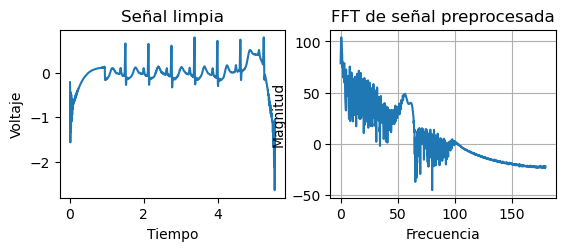

In [26]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(t, sf2)                                                                # Señal limpia, preprocesada
plt.title('Señal limpia') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(2,2,2)
plt.plot(w1, dBsf2)                                                             # Graficamos espectro de frecuencia de la señal sin ruido.
plt.title('FFT de señal preprocesada')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)

### Onda T

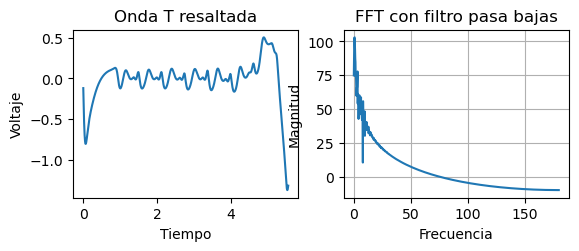

In [27]:
plt.subplot(2,2,1)
plt.plot(t, sf3)                                                                # ECG resalte de onda T
plt.title('Onda T resaltada') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(2,2,2)
plt.plot(w1, dBsf3)                                                             # Graficamos espectro de frecuencia donde se localiza la onda T.
plt.title('FFT con filtro pasa bajas')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)

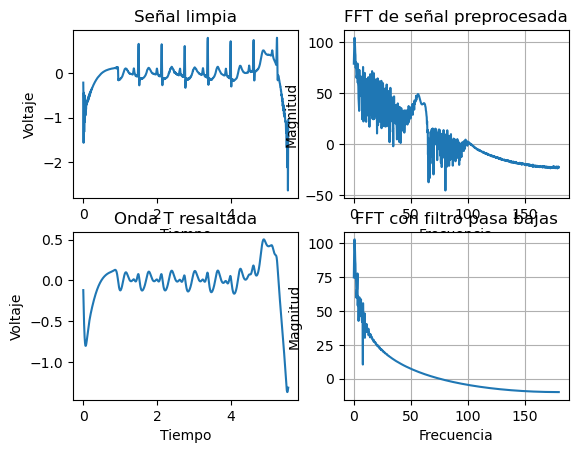

In [28]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(t, sf2)                                                                # Señal limpia, preprocesada
plt.title('Señal limpia') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(2,2,2)
plt.plot(w1, dBsf2)                                                             # Graficamos espectro de frecuencia de la señal sin ruido.
plt.title('FFT de señal preprocesada')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)
plt.subplot(2,2,3)
plt.plot(t, sf3)                                                                # ECG resalte de onda T
plt.title('Onda T resaltada') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(2,2,4)
plt.plot(w1, dBsf3)                                                             # Graficamos espectro de frecuencia donde se localiza la onda T.
plt.title('FFT con filtro pasa bajas')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)

### Onda R

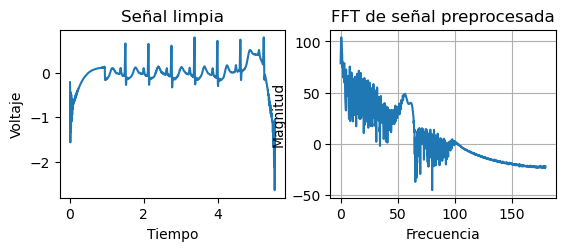

In [29]:

plt.figure()
plt.subplot(2,2,1)
plt.plot(t, sf2)                                                                # Señal limpia, preprocesada
plt.title('Señal limpia') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(2,2,2)
plt.plot(w1, dBsf2)                                                             # Graficamos espectro de frecuencia de la señal sin ruido.
plt.title('FFT de señal preprocesada')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)

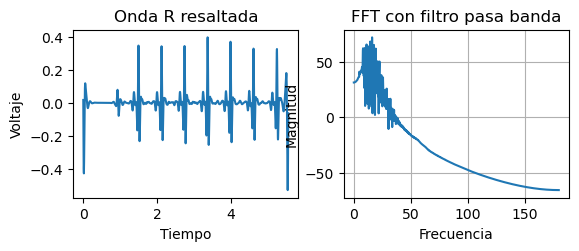

In [30]:
plt.subplot(2,2,1)
plt.plot(t, sf4)                                                                # ECG resalte de onda R
plt.title('Onda R resaltada') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(2,2,2)
plt.plot(w1, dBsf4)                                                             # Graficamos espectro de frecuencia donde se localiza la onda R.
plt.title('FFT con filtro pasa banda')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)

#### Onda R

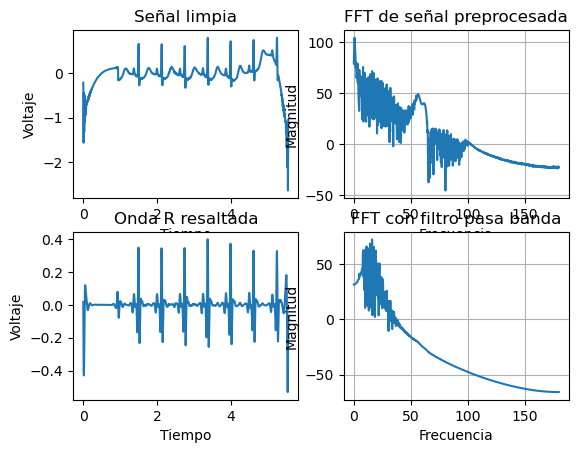

In [31]:

plt.figure()
plt.subplot(2,2,1)
plt.plot(t, sf2)                                                                # Señal limpia, preprocesada
plt.title('Señal limpia') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(2,2,2)
plt.plot(w1, dBsf2)                                                             # Graficamos espectro de frecuencia de la señal sin ruido.
plt.title('FFT de señal preprocesada')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)
plt.subplot(2,2,3)
plt.plot(t, sf4)                                                                # ECG resalte de onda R
plt.title('Onda R resaltada') 
plt.xlabel('Tiempo')   
plt.ylabel('Voltaje') 
plt.subplot(2,2,4)
plt.plot(w1, dBsf4)                                                             # Graficamos espectro de frecuencia donde se localiza la onda R.
plt.title('FFT con filtro pasa banda')  
plt.xlabel('Frecuencia')  
plt.ylabel('Magnitud') 
plt.grid(True)